In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture #implements EM algorithm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

%env OMP_NUM_THREADS=9

env: OMP_NUM_THREADS=9


In [213]:
dataf = pd.read_csv('Dataset/marketing_campaign_processed.csv')
X = pd.read_csv('Dataset/marketing_campaign_normal_processed.csv')
print(dataf.shape)
dataf.describe()

(2240, 20)


,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Promotions,Children_Number,Total_Spent,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1.267411,0.644643,52237.975446,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,53.194196,0.297768,0.950446,605.798214,12.537054
std,0.652347,0.478728,25037.955891,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,11.984069,0.678381,0.751803,602.249288,7.205741
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,5.000000,0.000000
25%,1.000000,0.000000,35538.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,45.000000,0.000000,0.000000,68.750000,6.000000
50%,1.000000,1.000000,51381.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,52.000000,0.000000,1.000000,396.000000,12.000000
75%,2.000000,1.000000,68289.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,63.000000,0.000000,1.000000,1045.500000,18.000000
max,2.000000,1.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,129.000000,4.000000,3.000000,2525.000000,32.000000


In [214]:
X.describe()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Promotions,Children_Number,Total_Spent,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.633705,0.644643,0.075959,0.203574,0.132172,0.096783,0.144886,0.102901,0.121607,0.155000,0.151290,0.095073,0.445398,0.265826,0.009375,0.264021,0.074442,0.316815,0.238412,0.391783
std,0.326173,0.478728,0.037655,0.225450,0.199867,0.130849,0.210923,0.156960,0.144109,0.128816,0.102915,0.104396,0.250074,0.121332,0.096391,0.116350,0.169595,0.250601,0.238988,0.225179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.050845,0.015908,0.005025,0.009275,0.011583,0.003802,0.024862,0.066667,0.074074,0.000000,0.230769,0.150000,0.000000,0.184466,0.000000,0.000000,0.025298,0.187500
50%,0.500000,1.000000,0.074671,0.116209,0.040201,0.038841,0.046332,0.030418,0.066298,0.133333,0.148148,0.071429,0.384615,0.300000,0.000000,0.252427,0.000000,0.333333,0.155159,0.375000
75%,1.000000,1.000000,0.100099,0.337743,0.165829,0.134493,0.193050,0.125475,0.154696,0.200000,0.222222,0.142857,0.615385,0.350000,0.000000,0.359223,0.000000,0.333333,0.412897,0.562500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
dataf=dataf[dataf['Income']<600000]
X = StandardScaler().fit_transform(dataf)
X = pd.DataFrame(X, columns = dataf.columns)
X.describe()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Promotions,Children_Number,Total_Spent,Total_Purchases
count,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03,2.239000e+03
mean,3.724875e-16,-4.010489e-16,-5.637580e-17,-1.963592e-17,-9.669205e-18,2.563579e-17,-3.917267e-18,-8.578320e-17,-1.160305e-17,-1.011548e-17,1.299144e-17,1.601617e-17,-8.107256e-17,2.096482e-16,-2.768492e-16,2.477300e-16,-4.906501e-16,-2.489200e-17,5.013111e-17,1.243113e-16
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-1.943104e+00,-1.346408e+00,-2.346716e+00,-9.035115e-01,-6.614538e-01,-7.400151e-01,-6.872009e-01,-6.559271e-01,-8.442025e-01,-1.203083e+00,-1.470265e+00,-9.110149e-01,-1.781745e+00,-2.190805e+00,-9.730359e-02,-2.269738e+00,-4.391541e-01,-1.264195e+00,-9.981757e-01,-1.740443e+00
25%,-4.101195e-01,-1.346408e+00,-7.675483e-01,-8.321975e-01,-6.363109e-01,-6.691224e-01,-6.322814e-01,-6.317004e-01,-6.716666e-01,-6.854614e-01,-7.504827e-01,-9.110149e-01,-8.587881e-01,-9.545086e-01,-9.730359e-02,-6.841343e-01,-4.391541e-01,-1.264195e+00,-8.918880e-01,-9.076637e-01
50%,-4.101195e-01,7.427170e-01,-2.719133e-02,-3.864847e-01,-4.603102e-01,-4.431522e-01,-4.675229e-01,-4.621137e-01,-3.841067e-01,-1.678398e-01,-3.070084e-02,-2.267605e-01,-2.434836e-01,2.817880e-01,-9.730359e-02,-9.996448e-02,-4.391541e-01,6.594249e-02,-3.488246e-01,-7.488443e-02
75%,1.122865e+00,7.427170e-01,7.621241e-01,5.955689e-01,1.682635e-01,2.879281e-01,2.281240e-01,1.435530e-01,2.293544e-01,3.497818e-01,6.890810e-01,4.574939e-01,6.794732e-01,6.938869e-01,-9.730359e-02,8.180166e-01,-4.391541e-01,6.594249e-02,7.306593e-01,7.578949e-01
max,1.122865e+00,7.427170e-01,5.159021e+00,3.532816e+00,4.341993e+00,6.903097e+00,4.054182e+00,5.715687e+00,6.095576e+00,6.561241e+00,8.246791e+00,8.668547e+00,2.217734e+00,6.051173e+00,1.027711e+01,6.325903e+00,5.457493e+00,2.726217e+00,3.186900e+00,2.701047e+00


Text(0.5, 1.0, '2D Projection')

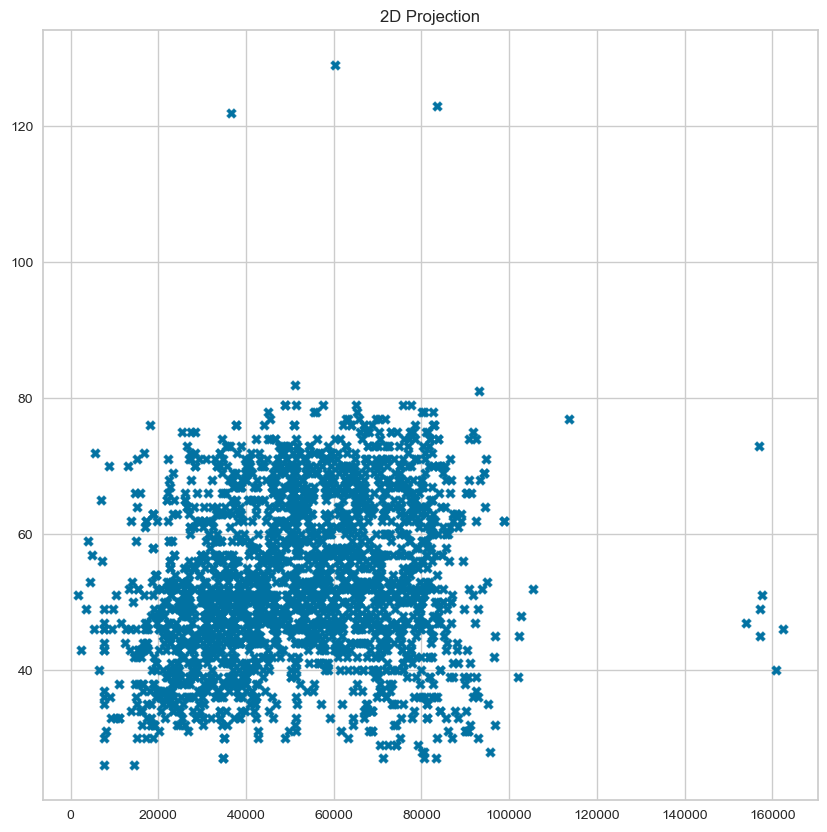

In [216]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(dataf.Income, dataf.Age, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')

# PCA

In [217]:
pca = PCA(n_components = 20)
pca.fit(X)
X = pd.DataFrame(pca.transform(X)[:,:3], columns = (["col_1", "col_2","col_3"]))
x = X['col_1']
y = X['col_2']
z = X['col_3']

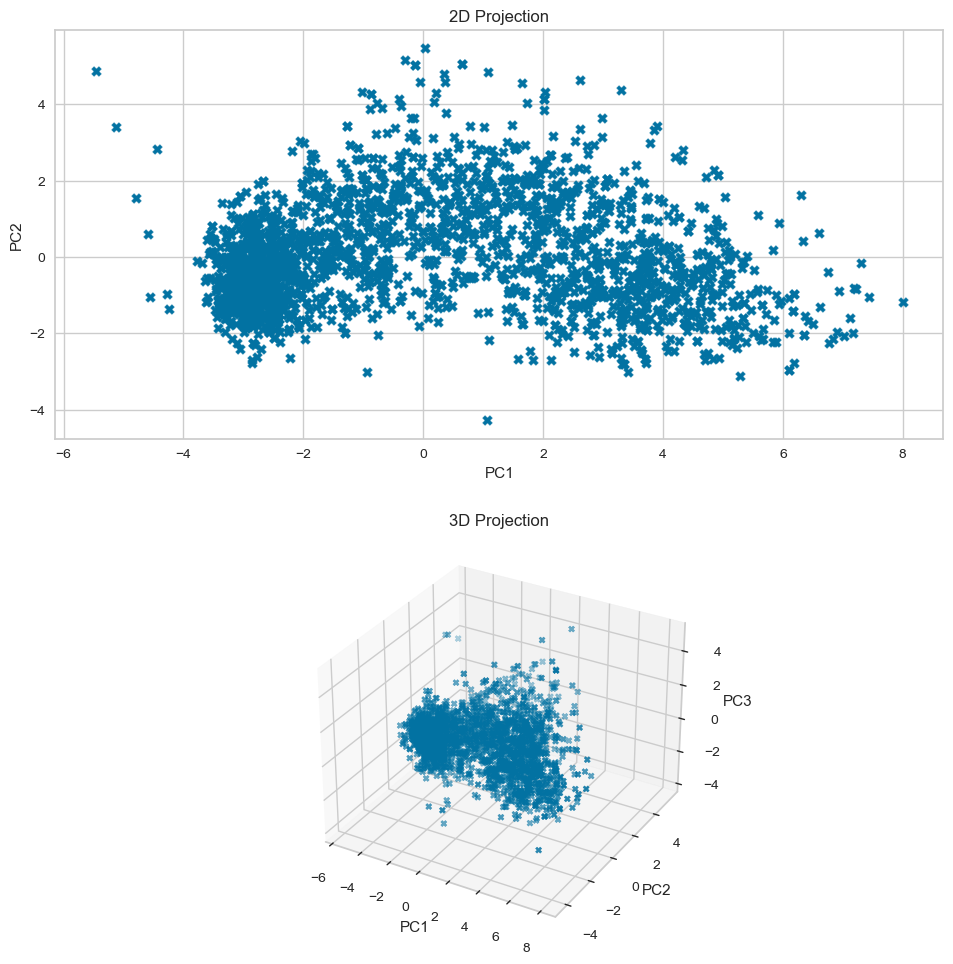

In [218]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax1 = fig.add_subplot(212, projection='3d')
ax1.scatter(x, y,z, marker= "X", cmap = 'viridis')
ax1.set_title('3D Projection')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
plt.tight_layout(pad=2.0)
plt.show()

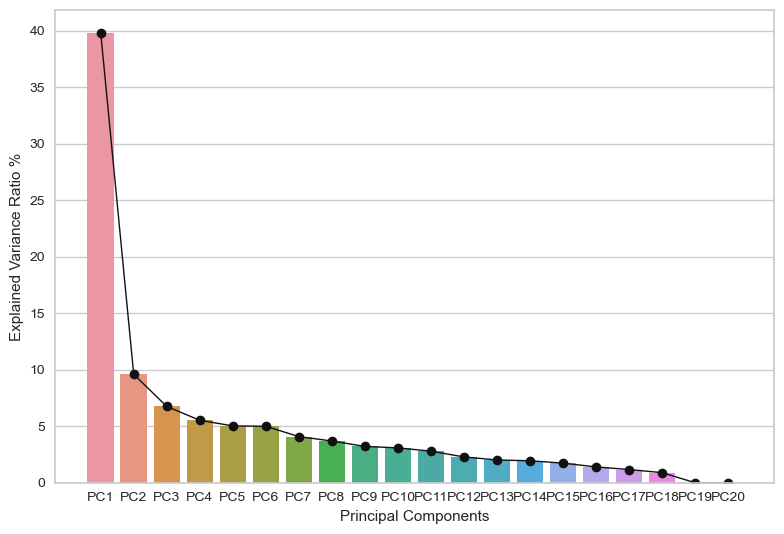

In [219]:
import seaborn as sns
explained_var_ratio = pca.explained_variance_ratio_*100
explained_var_ratio
PC = [f'PC{i+1}' for i in range(len(explained_var_ratio))]
sns.barplot(x=PC, y=explained_var_ratio)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC, pca.explained_variance_ratio_*100, 'o-', linewidth=1, color='k')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio %')
plt.tight_layout()

In [220]:
X.iloc[:,0:2]

,col_1,col_2
0,4.289807,-0.013503
1,-2.798995,-0.243890
2,2.077818,-0.159809
3,-2.719141,-0.901764
4,-0.103997,0.788172
...,...,...
2234,2.691589,0.739095
2235,-0.872063,4.261779
2236,1.972514,-0.562725
2237,2.145173,0.922048


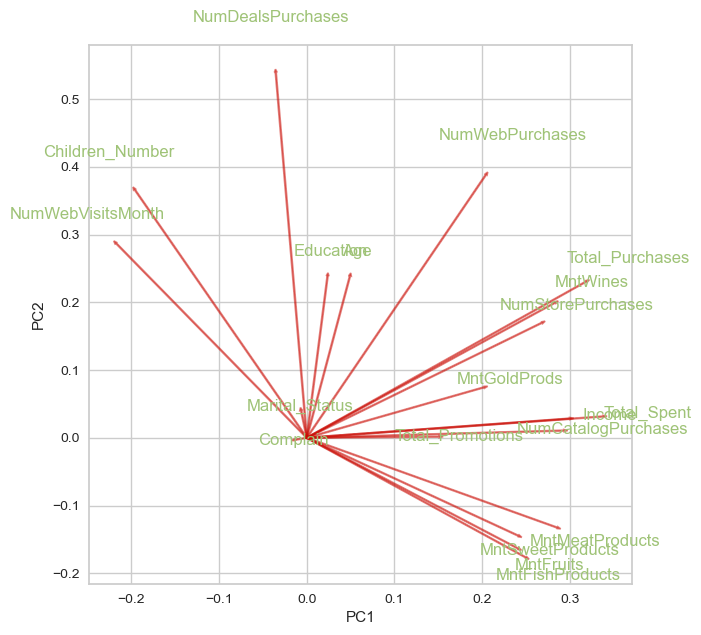

In [221]:
def myplot(coeff,labels=None):
    plt.figure(figsize=(7,7))
    n = coeff.shape[0]

    """theta = np.linspace( 0 , 2 * np.pi , 150 )
 
    radius = 0.5
 
    a = radius * np.cos( theta )
    b = radius * np.sin( theta )


    plt.plot( a, b, linewidth=1, color='k')
    """
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,linewidth=1.25)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    

#Call the function. Use only the 2 PCs.
myplot(np.transpose(pca.components_[0:2, :]), labels = dataf.columns)
plt.show()

# Hierarchical

In [222]:
# indexes
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score,silhouette_score

def indexes_scores(hc_method,distance_metric,X):
    scores_db = []
    for k in range(2,11):

        hc = AgglomerativeClustering(n_clusters=k, linkage=hc_method, affinity=distance_metric)
        hc.fit(X)
        hc_clusters = hc.labels_

        score = davies_bouldin_score(X, hc_clusters) 
        scores_db.append(score)


    k_db = np.argmin(scores_db)
    return scores_db,k_db

In [223]:
def plot_kindexes(X, scores_db,k_db):
    fig = plt.figure(figsize = (7, 7))

    ax = fig.add_subplot(211)
    sil = KElbowVisualizer(AgglomerativeClustering(linkage=hc_method, affinity=distance_metric), 
                               metric = 'silhouette', timings=False)
    sil.fit(X)
    k_sil = int(sil.elbow_value_)
    ax.set_xlabel('k')
    ax.set_ylabel('score')
    ax.set_title('Silhouette Index')
    ax.legend(['',f'k={k_sil}, score={np.round(sil.elbow_score_,2)}'])

    ax1 = fig.add_subplot(223)
    ch = KElbowVisualizer(AgglomerativeClustering(linkage=hc_method, affinity=distance_metric), 
                               metric = 'calinski_harabasz', timings=False)
    ch.fit(X)
    k_ch = int(ch.elbow_value_)
    ax1.set_xlabel('k')
    ax1.set_ylabel('score')
    ax1.set_title('Calinski Harabasz Index')
    ax1.legend(['',f'k={k_ch}, score={np.round(ch.elbow_score_,2)}'])

    ax2 = fig.add_subplot(224)
    ax2.plot(list(range(2,11)), scores_db, color='b', marker='d')
    ax2.axvline(k_db+2, color='k',linestyle='--')
    ax2.set_xlabel('k')
    ax2.set_ylabel('score')
    ax2.set_title('Davies Bouldin Index')
    ax2.legend(['',f'k={k_db+2}, score={np.round(scores_db[(k_db)],2)}'])

    plt.tight_layout()
    plt.show()

## Single

In [255]:
hc_method = 'single'
distance_metric = 'euclidean'

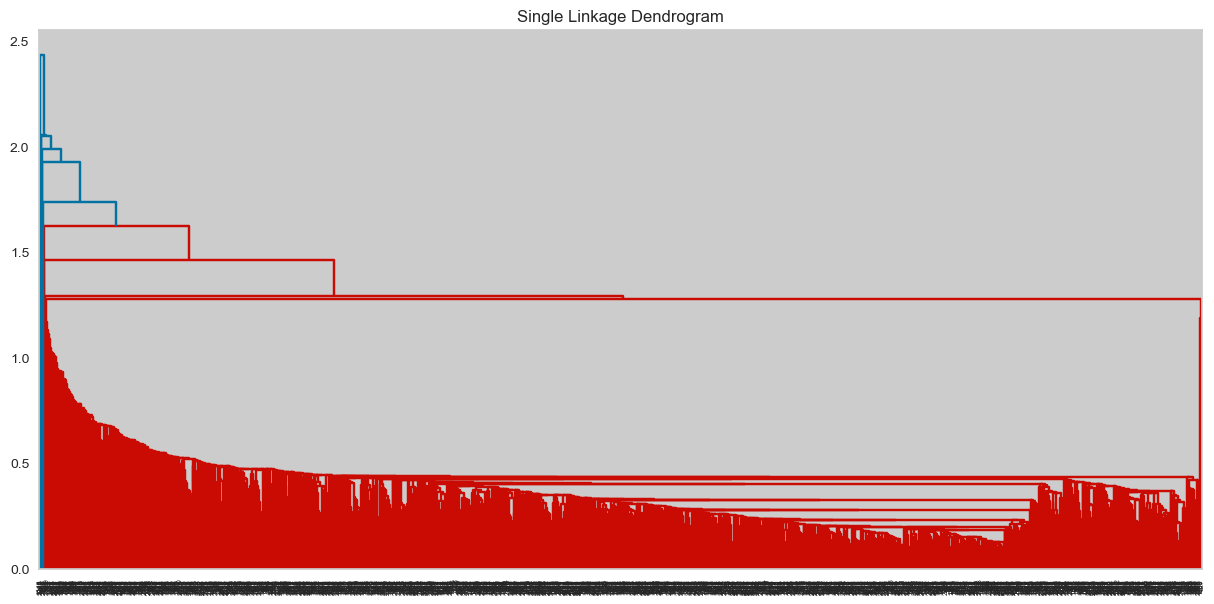

In [256]:
plt.figure(figsize=(15, 7))
plt.title("Single Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters = shc.dendrogram(Z=distance_mat)
plt.show()

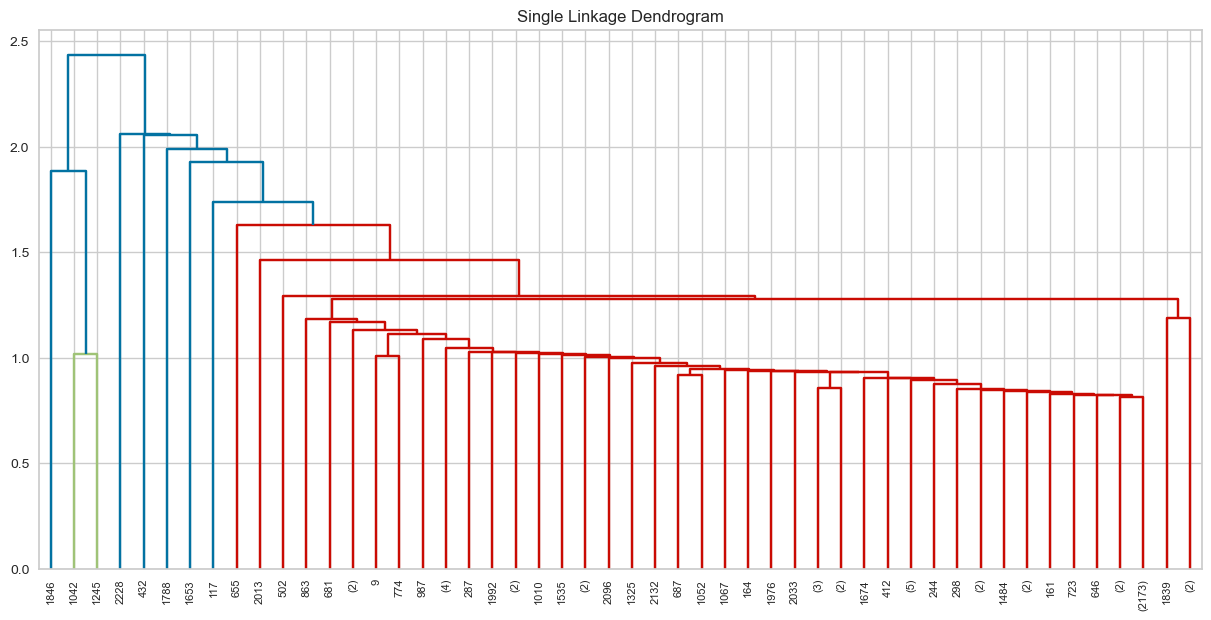

In [257]:
plt.figure(figsize=(15, 7))
plt.title("Single Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters =  shc.dendrogram(Z=distance_mat, truncate_mode='lastp', p=50)
plt.show()

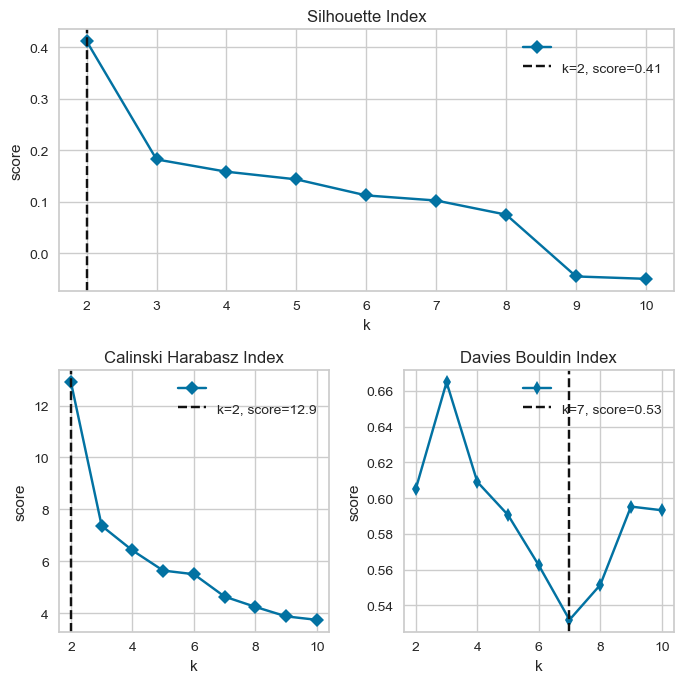

In [258]:
scores_db,k_db = indexes_scores(hc_method,distance_metric,X)
plot_kindexes(X,scores_db,k_db)

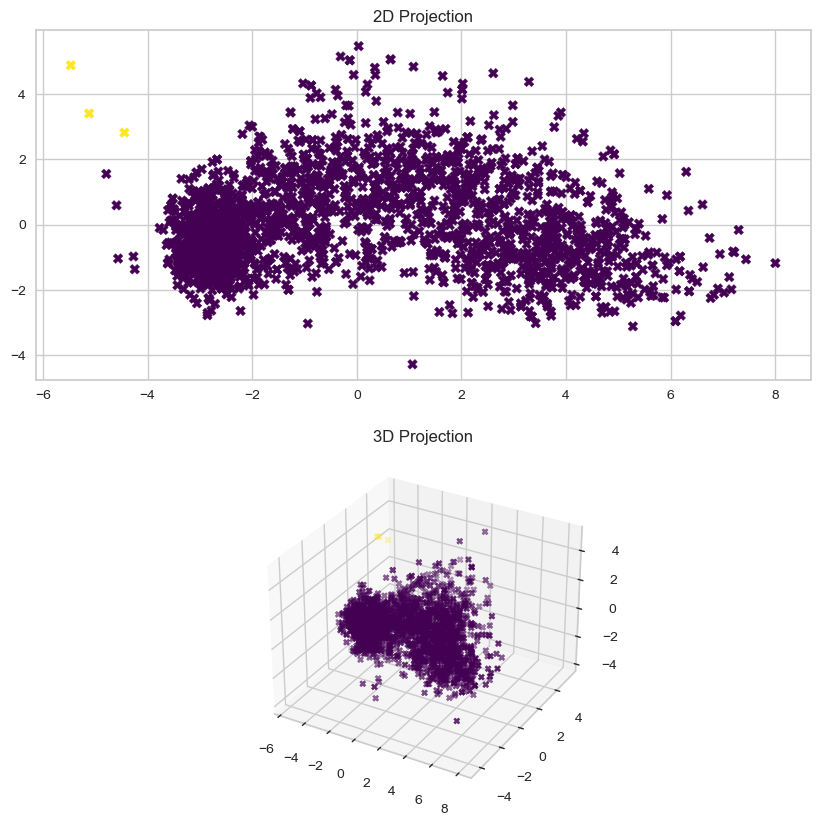

In [228]:
hc = AgglomerativeClustering(n_clusters=2, linkage=hc_method, affinity=distance_metric)
hc.fit(X)
clusters = hc.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')

ax1 = fig.add_subplot(212, projection='3d')
ax1.scatter(x, y,z, c=clusters, marker= "X", cmap = 'viridis')
ax1.set_title('3D Projection')
plt.show()

## Complete

In [250]:
hc_method = 'complete'
distance_metric = 'euclidean'

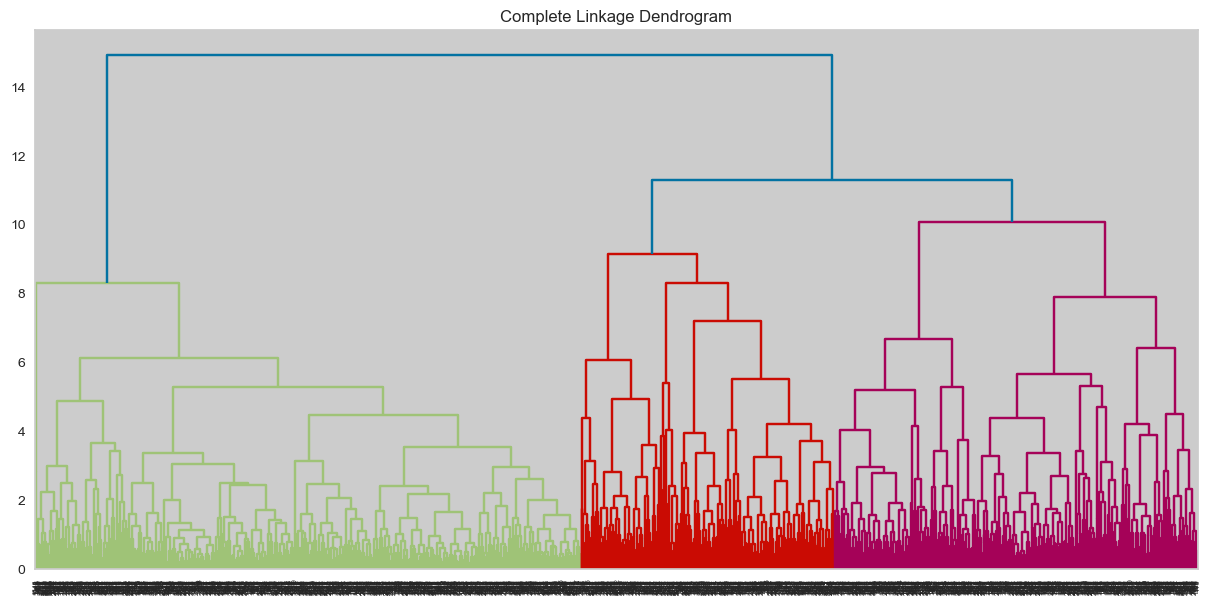

In [251]:
plt.figure(figsize=(15, 7))
plt.title("Complete Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters = shc.dendrogram(Z=distance_mat)
plt.show()

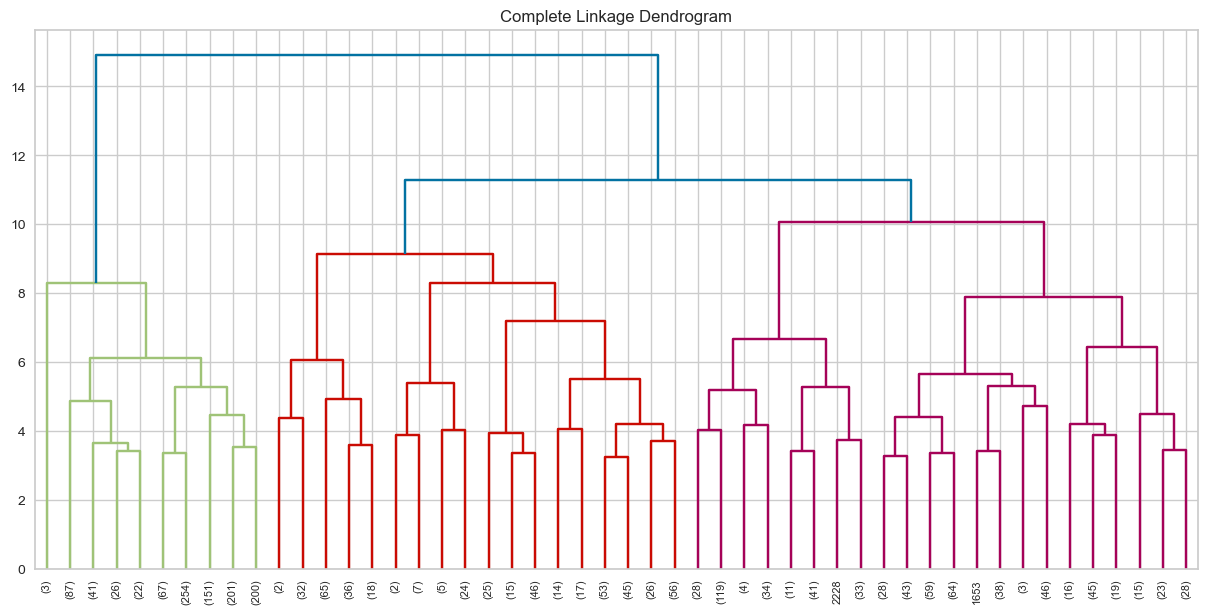

In [252]:
plt.figure(figsize=(15, 7))
plt.title("Complete Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters =  shc.dendrogram(Z=distance_mat, truncate_mode='lastp', p=50)
plt.show()

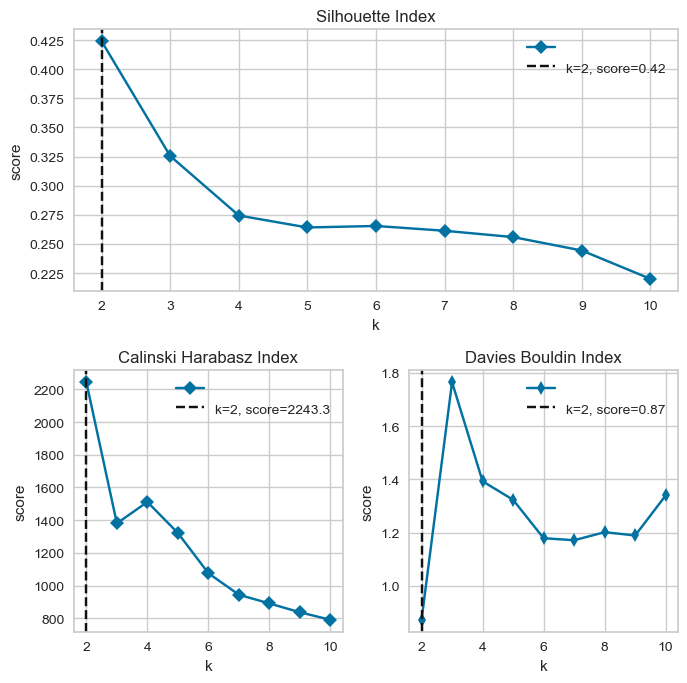

In [253]:
scores_db,k_db = indexes_scores(hc_method,distance_metric,X)
plot_kindexes(X,scores_db,k_db)

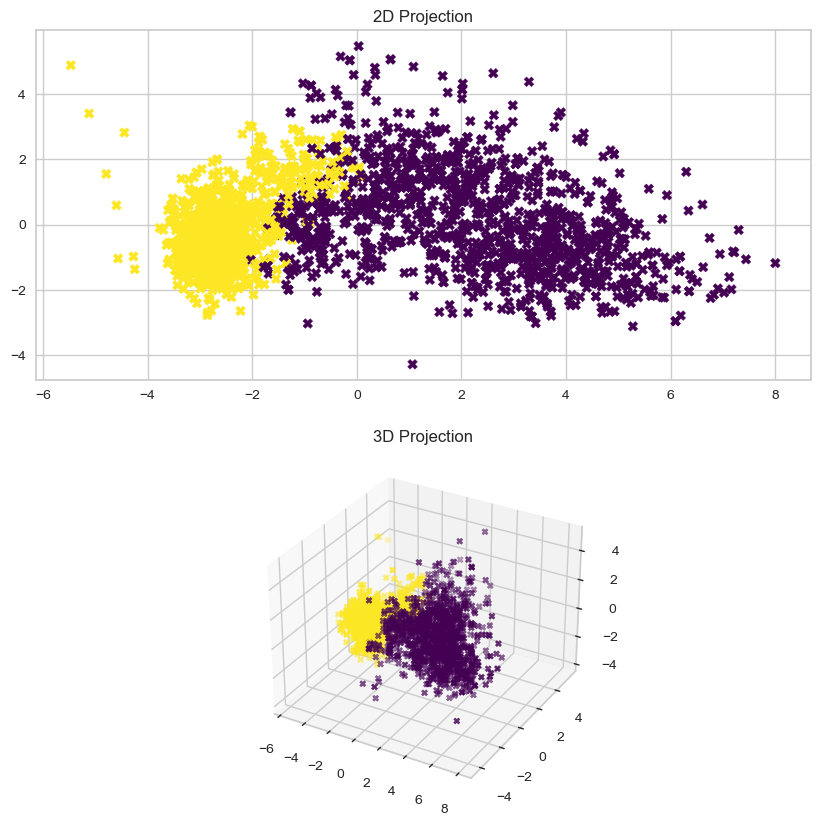

In [254]:
hc = AgglomerativeClustering(n_clusters=2, linkage=hc_method, affinity=distance_metric)
hc.fit(X)
clusters = hc.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')

ax1 = fig.add_subplot(212, projection='3d')
ax1.scatter(x, y,z, c=clusters, marker= "X", cmap = 'viridis')
ax1.set_title('3D Projection')
plt.show()

## Ward

In [238]:
hc_method = 'ward'
distance_metric = 'euclidean'

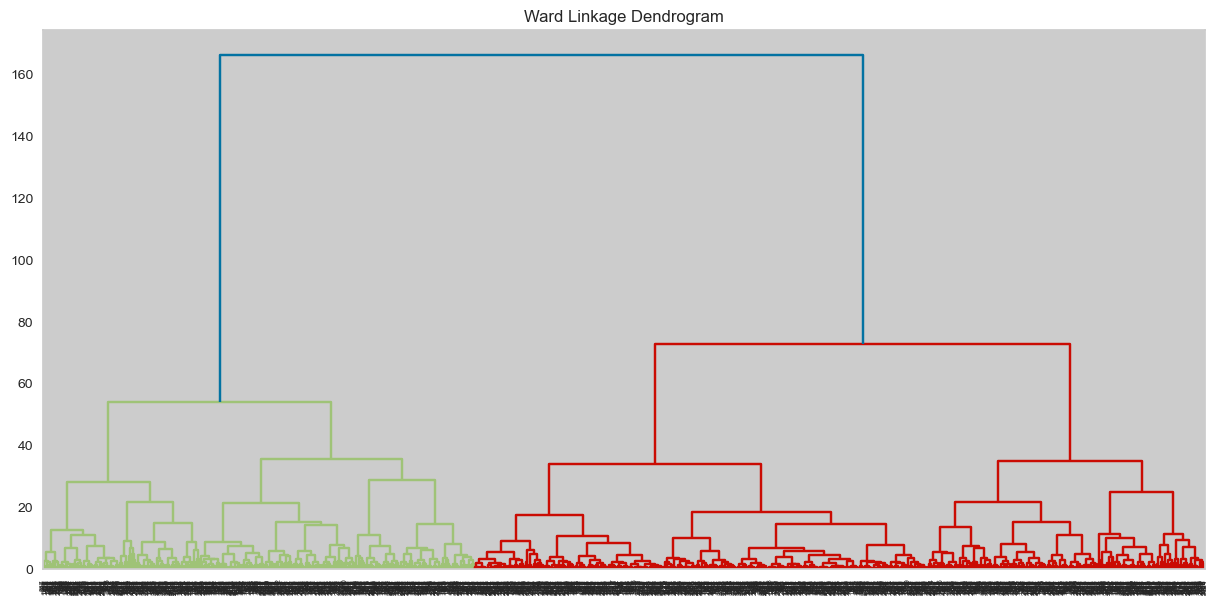

In [239]:
plt.figure(figsize=(15, 7))
plt.title("Ward Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters = shc.dendrogram(Z=distance_mat)
plt.show()

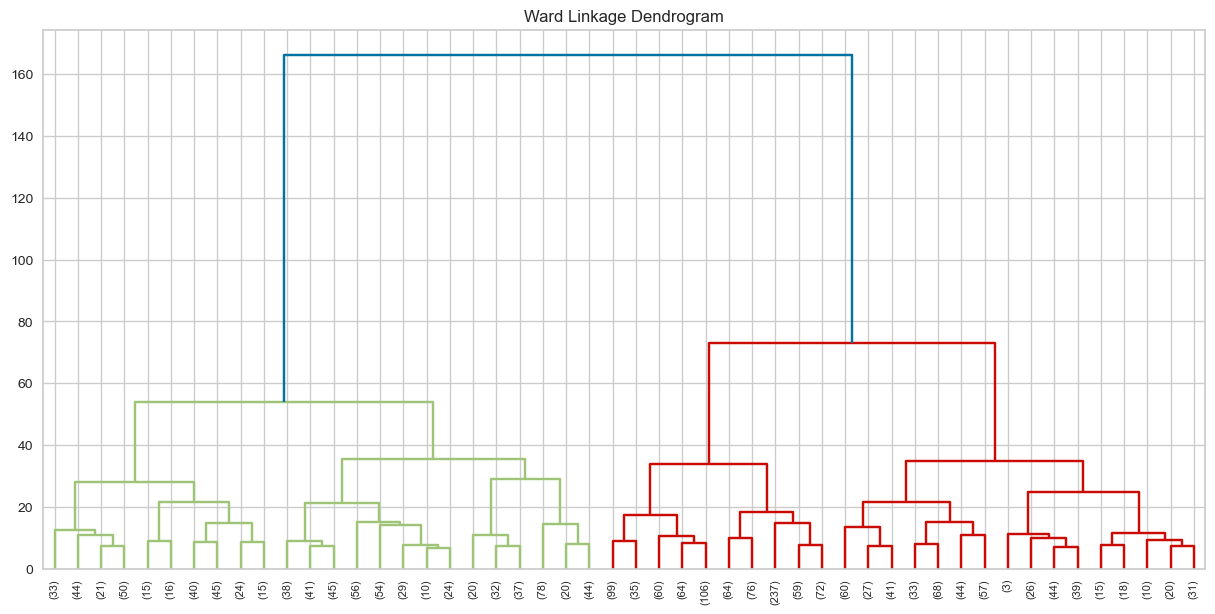

In [240]:
plt.figure(figsize=(15, 7))
plt.title("Ward Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters =  shc.dendrogram(Z=distance_mat, truncate_mode='lastp', p=50)
plt.show()

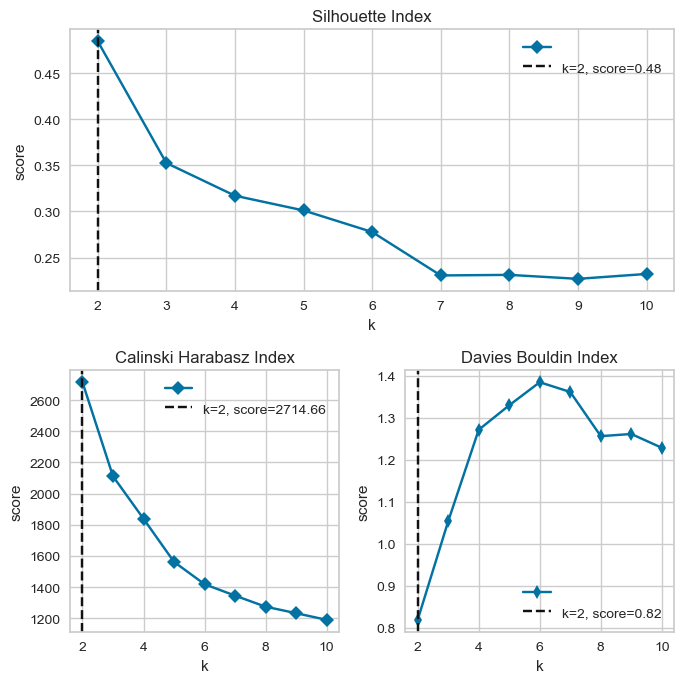

In [241]:
scores_db,k_db = indexes_scores(hc_method,distance_metric,X)
plot_kindexes(X,scores_db,k_db)

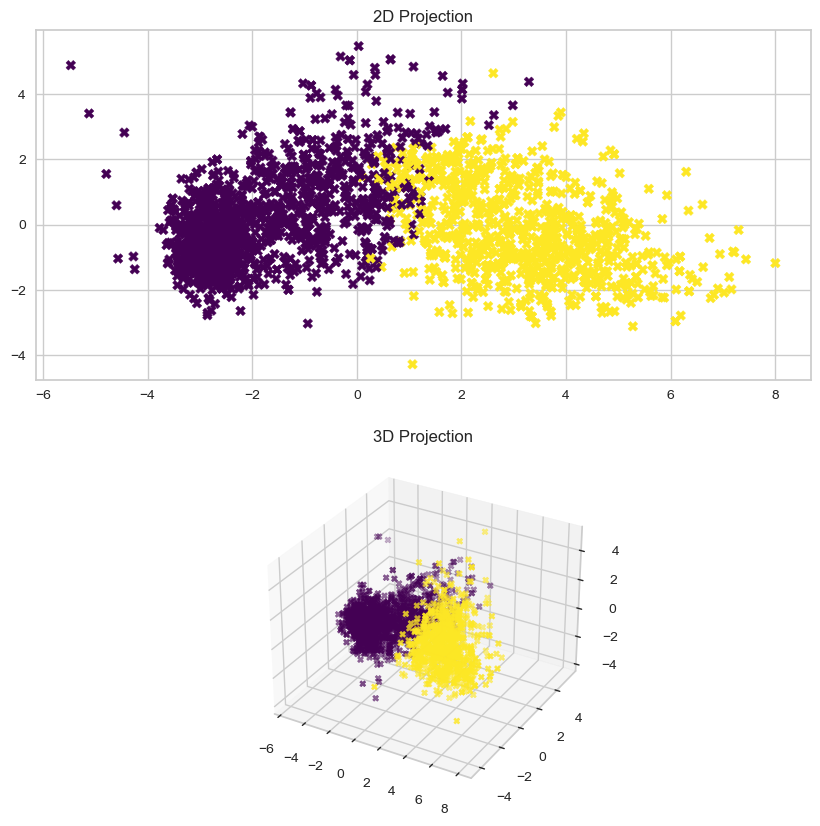

In [242]:
hc = AgglomerativeClustering(n_clusters=2, linkage=hc_method, affinity=distance_metric)
hc.fit(X)
clusters = hc.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')

ax1 = fig.add_subplot(212, projection='3d')
ax1.scatter(x, y,z, c=clusters, marker= "X", cmap = 'viridis')
ax1.set_title('3D Projection')
plt.show()

## Average

In [262]:
hc_method = 'average'
distance_metric = 'euclidean'

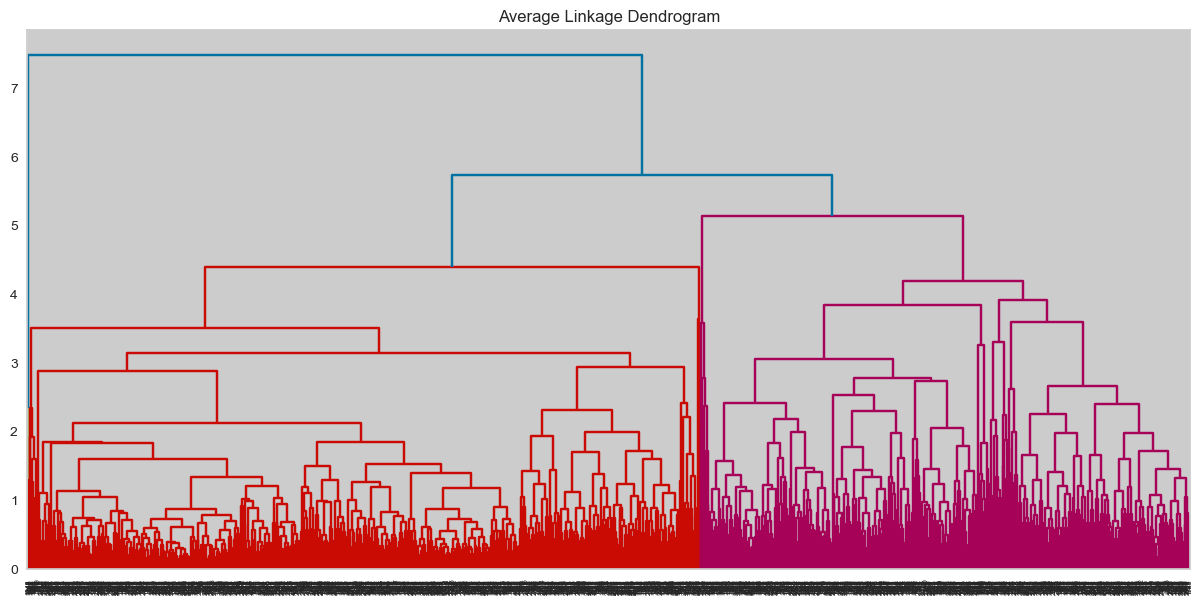

In [263]:
plt.figure(figsize=(15, 7))
plt.title("Average Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters = shc.dendrogram(Z=distance_mat)
plt.show()

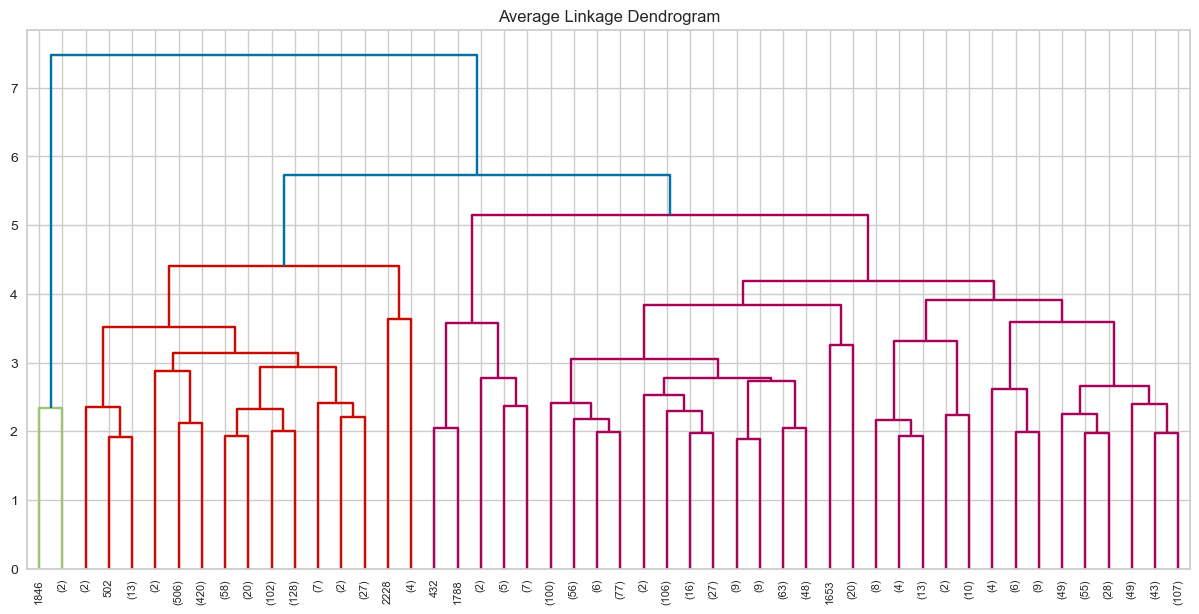

In [264]:
plt.figure(figsize=(15, 7))
plt.title("Average Linkage Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters =  shc.dendrogram(Z=distance_mat, truncate_mode='lastp', p=50)
plt.show()

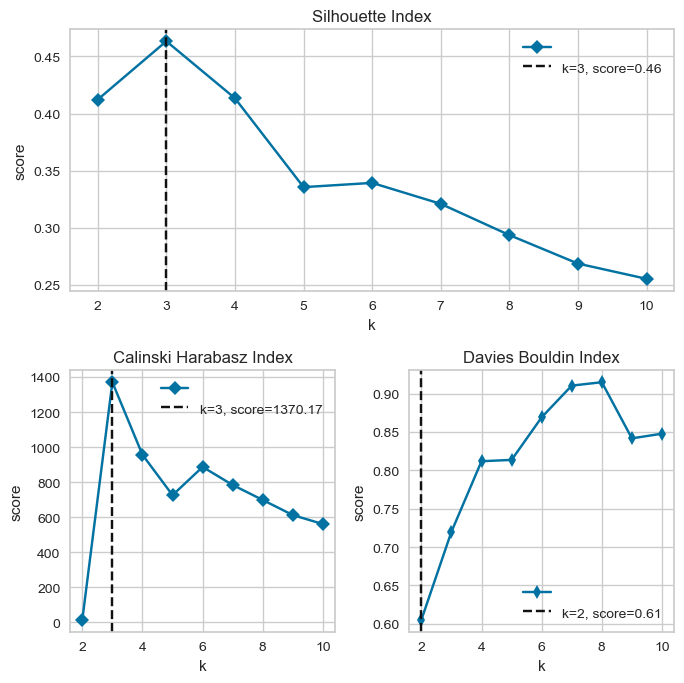

In [265]:
scores_db,k_db = indexes_scores(hc_method,distance_metric,X)
plot_kindexes(X,scores_db,k_db)

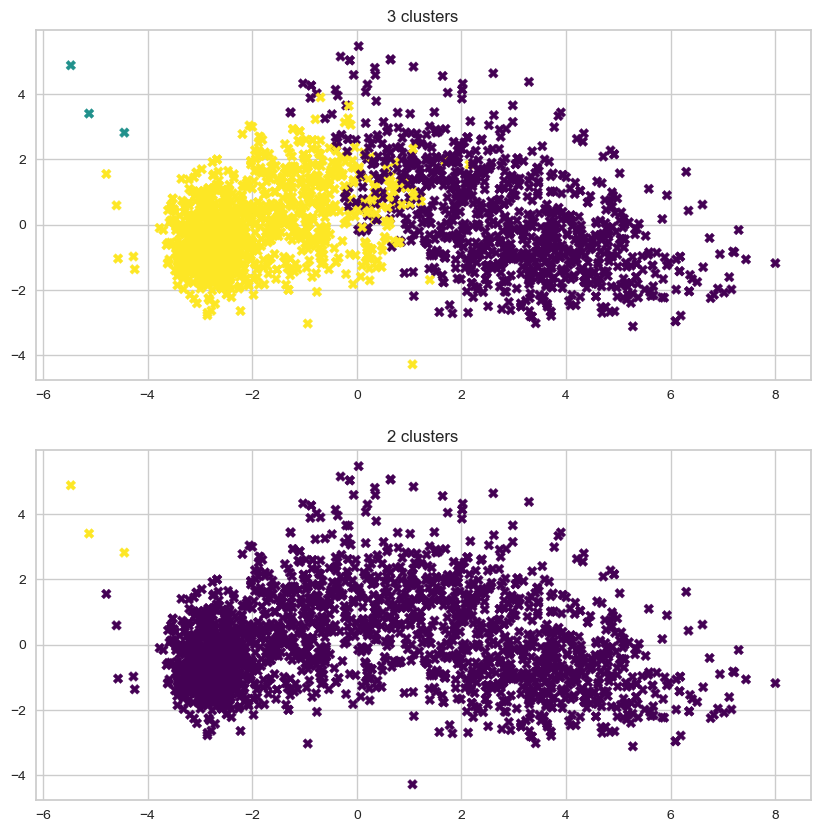

In [268]:
hc = AgglomerativeClustering(n_clusters=3, linkage=hc_method, affinity=distance_metric)
hc.fit(X)
clusters = hc.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('3 clusters')

hc = AgglomerativeClustering(n_clusters=2, linkage=hc_method, affinity=distance_metric)
hc.fit(X)
clusters = hc.labels_

ax1 = fig.add_subplot(212)
ax1.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax1.set_title('2 clusters')

plt.show()

# PARTITIONAL

In [269]:
def indexes_scores(X):

    scores_db = []
    for k in range(2,11):

        kmeans = KMeans(n_clusters=k, init='k-means++')
        KM_clusters = kmeans.fit_predict(X)

        score = davies_bouldin_score(X, KM_clusters) 
        scores_db.append(score)



    k_db = np.argmin(scores_db)
    return scores_db,k_db

In [270]:
def plot_kindexes(X, scores_db,k_db):
    fig = plt.figure(figsize = (7, 7))

    ax = fig.add_subplot(211)
    sil = KElbowVisualizer(KMeans(init='k-means++'), 
                               metric = 'silhouette', timings=False)
    sil.fit(X)
    k_sil = int(sil.elbow_value_)
    ax.set_xlabel('k')
    ax.set_ylabel('score')
    ax.set_title('Silhouette Index')
    ax.legend(['',f'k={k_sil}, score={np.round(sil.elbow_score_,2)}'])

    ax1 = fig.add_subplot(223)
    ch = KElbowVisualizer(KMeans(init='k-means++'), 
                               metric = 'calinski_harabasz', timings=False)
    ch.fit(X)
    k_ch = int(ch.elbow_value_)
    ax1.set_xlabel('k')
    ax1.set_ylabel('score')
    ax1.set_title('Calinski Harabasz Index')
    ax1.legend(['',f'k={k_ch}, score={np.round(ch.elbow_score_,2)}'])

    ax2 = fig.add_subplot(224)
    ax2.plot(list(range(2,11)), scores_db, color='b', marker='d')
    ax2.axvline(k_db+2, color='k',linestyle='--')
    ax2.set_xlabel('k')
    ax2.set_ylabel('score')
    ax2.set_title('Davies Bouldin Index')
    ax2.legend(['',f'k={k_db+2}, score={np.round(scores_db[(k_db)],2)}'])

    plt.tight_layout()
    plt.show()

## KMeans

In [271]:
import warnings
warnings.filterwarnings('ignore')

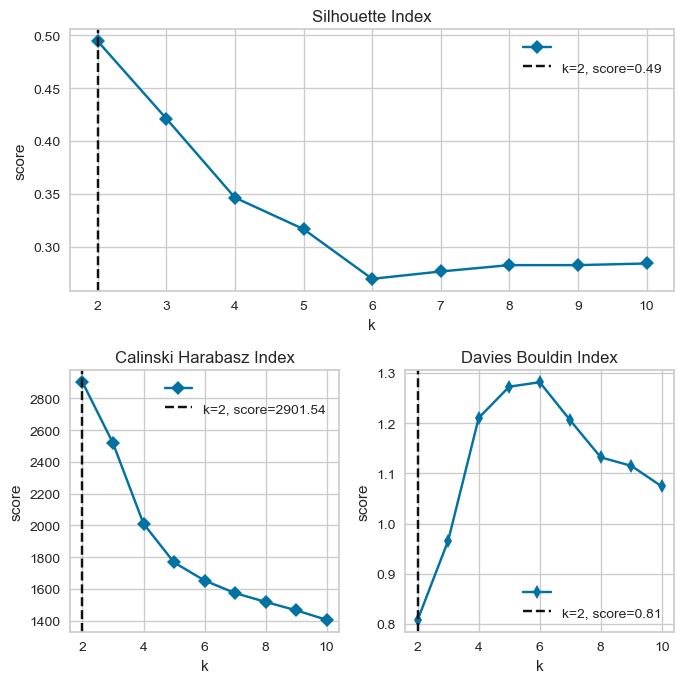

In [272]:

scores_db,k_db = indexes_scores(X)
plot_kindexes(X,scores_db,k_db)

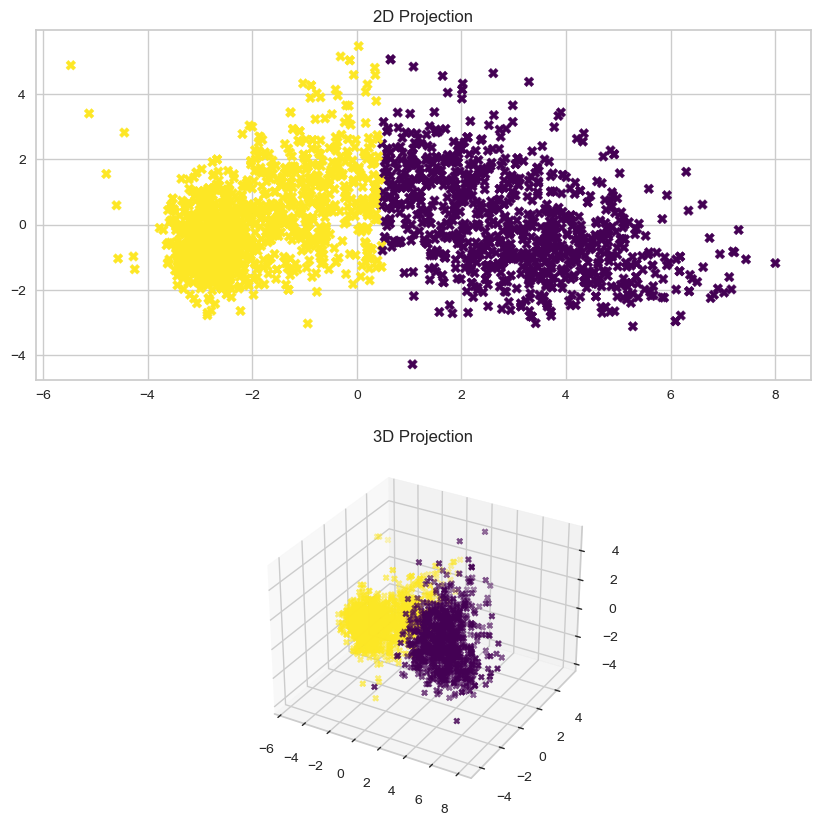

In [273]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')

ax1 = fig.add_subplot(212, projection='3d')
ax1.scatter(x, y,z, c=clusters, marker= "X", cmap = 'viridis')
ax1.set_title('3D Projection')
plt.show()

Text(0, 0.5, 'Total Spent')

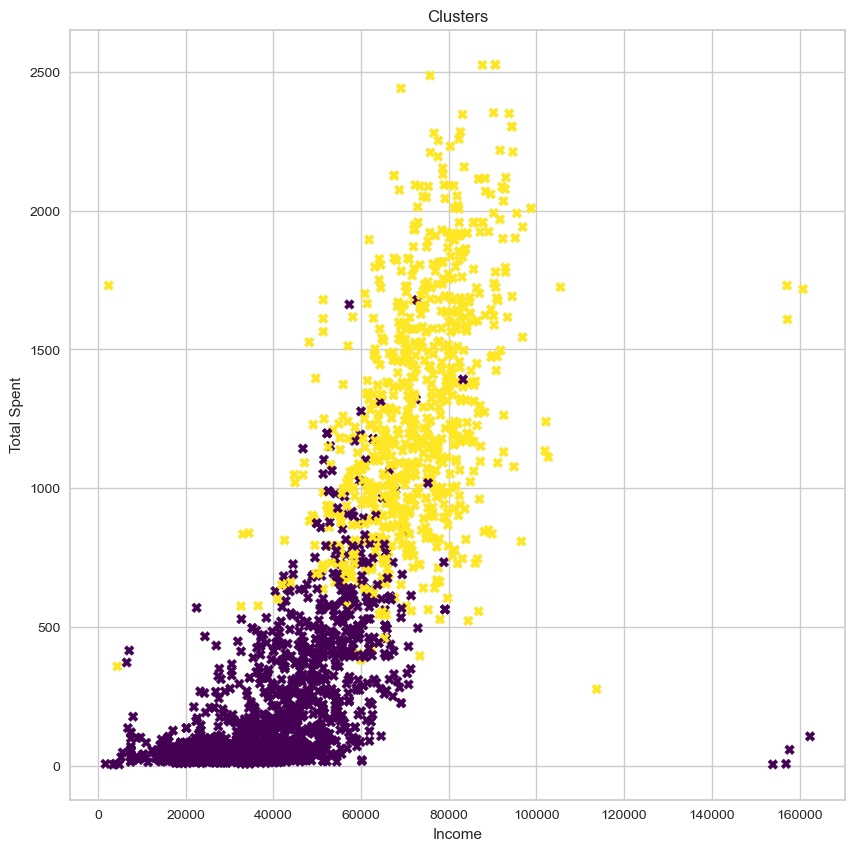

In [286]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
xstandard = StandardScaler().fit_transform(dataf)
xstandard = pd.DataFrame(xstandard, columns=dataf.columns)
hc.fit(X)
clusters = hc.labels_

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(dataf.Income, dataf.Total_Spent, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('Clusters')
ax.set_xlabel('Income')
# ax.set_zlabel('Total Spent')
ax.set_ylabel('Total Spent')

# PROBABILISTIC

In [275]:
def indexes_scores(X):
    
    scores_sil = []
    scores_ch = []
    scores_db = []
    for k in range(2,11):

        gm = GaussianMixture(n_components=k, init_params='kmeans').fit(X)
        gm_clusters = gm.predict(X)
        
        score = silhouette_score(X, gm_clusters)
        scores_sil.append(score)
        
        score = calinski_harabasz_score(X, gm_clusters)
        scores_ch.append(score)
        
        score = davies_bouldin_score(X, gm_clusters) 
        scores_db.append(score)


    k_sil = np.argmax(scores_sil)
    k_ch = np.argmax(scores_ch)
    k_db = np.argmin(scores_db)
    return scores_sil, k_sil, scores_ch, k_ch, scores_db,k_db

In [279]:
def plot_kindexes(X, scores_sil, k_sil, scores_ch, k_ch, scores_db,k_db):
    fig = plt.figure(figsize = (7, 7))

    ax = fig.add_subplot(211)
    ax.plot(list(range(2,11)), scores_sil, color='b', marker='d')
    ax.axvline(k_sil+2, color='k',linestyle='--')
    ax.set_xlabel('k')
    ax.set_ylabel('score')
    ax.set_title('Silhouette Index')
    ax.legend(['',f'k={k_sil+2}, score={np.round(scores_sil[(k_sil)],2)}'])

    ax1 = fig.add_subplot(223)
    ax1.plot(list(range(2,11)), scores_ch, color='b', marker='d')
    ax1.axvline(k_ch+2, color='k',linestyle='--')
    ax1.set_xlabel('k')
    ax1.set_ylabel('score')
    ax1.set_title('Calinski Harabasz Index')
    ax1.legend(['',f'k={k_ch+2}, score={np.round(scores_ch[(k_ch)],2)}'])

    ax2 = fig.add_subplot(224)
    ax2.plot(list(range(2,11)), scores_db, color='b', marker='d')
    ax2.axvline(k_db+2, color='k',linestyle='--')
    ax2.set_xlabel('k')
    ax2.set_ylabel('score')
    ax2.set_title('Davies Bouldin Index')
    ax2.legend(['',f'k={k_db+2}, score={np.round(scores_db[(k_db)],2)}'])

    plt.tight_layout()
    plt.show()

## EM

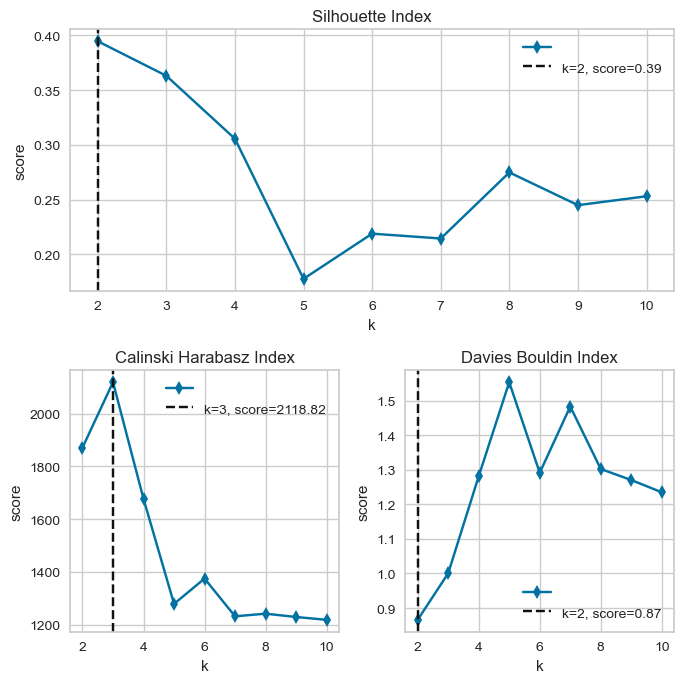

In [280]:

scores_sil, k_sil, scores_ch, k_ch, scores_db,k_db = indexes_scores(X)
plot_kindexes(X,scores_sil, k_sil, scores_ch, k_ch, scores_db,k_db)

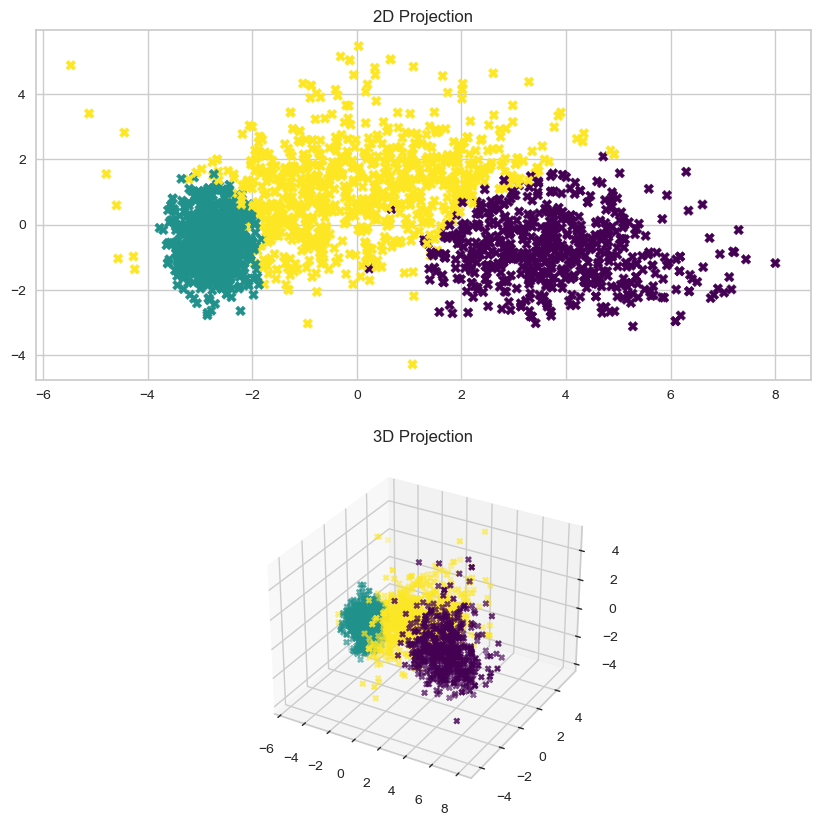

In [282]:
gm = GaussianMixture(n_components=3, init_params='kmeans')
gm.fit(X)
clusters = gm.predict(X)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(211)
ax.scatter(x, y, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('2D Projection')

ax1 = fig.add_subplot(212, projection='3d')
ax1.scatter(x, y,z, c=clusters, marker= "X", cmap = 'viridis')
ax1.set_title('3D Projection')
plt.show()

Text(0, 0.5, 'Total Spent')

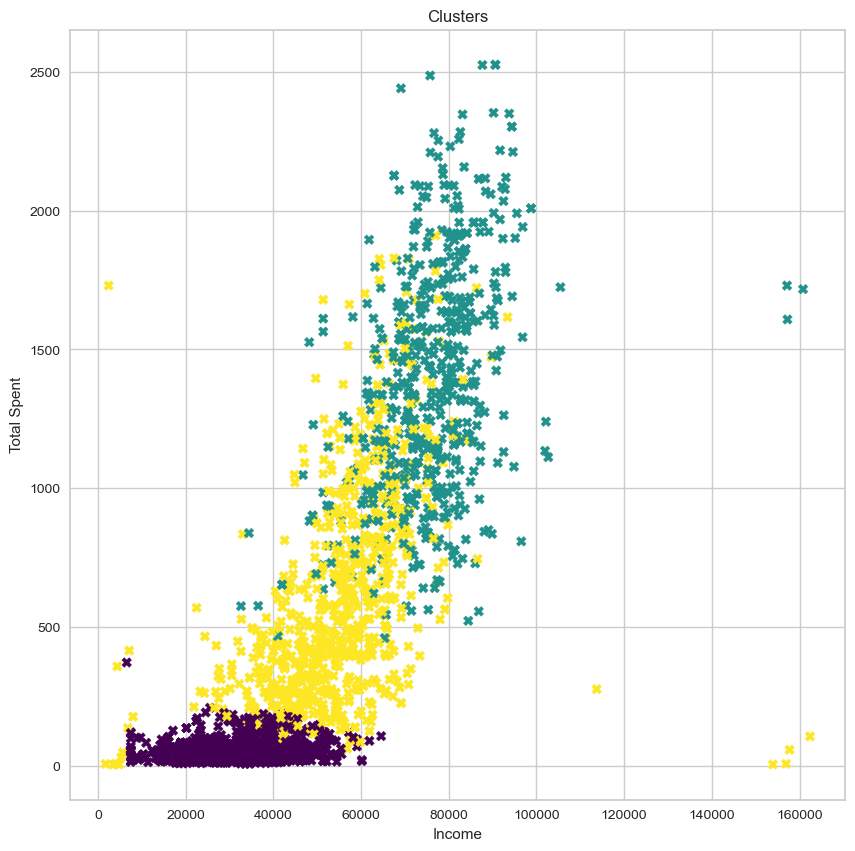

In [285]:
gm = GaussianMixture(n_components=3, init_params='kmeans')

xstandard = StandardScaler().fit_transform(dataf)
xstandard = pd.DataFrame(xstandard, columns=dataf.columns)

gm.fit(X)
clusters = gm.predict(X)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(dataf.Income, dataf.Total_Spent, c=clusters, marker= "X", cmap = 'viridis')
ax.set_title('Clusters')
ax.set_xlabel('Income')
# ax.set_zlabel('Total Spent')
ax.set_ylabel('Total Spent')